# Lab-1
Churn Modeling Analysis

## Data Loading

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv(r'/Gunjan/Churn_Modelling.csv')

In [ ]:
df.head(2)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Feature Engineering

In [ ]:
df.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace=True)

In [ ]:
df.head(2)

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42       2      0.00              1   
1          608     Spain  Female   41       1  83807.86              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0

In [ ]:
# here we are doing OneHotEncoding for make text to number as 0 or 1
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                  0   
1                  1        112542.58       0                  0   
2                  0        113931.57       1                  0   
3                  0         93826.63       0                  0   
4                  1         79084.10       0                  0   
...              ...              ...     ...                ...   
9995               0         96270.64       0                  0   
9996               1        101699.77       0                  0   
9997               1         42085.58       1                  0   
9998               0         92888.52       1                  1   
9999               0         38190.78       0                  0   

      Geography_Spain  Gender_Male  
0                   0            0  
1                   1            0  
2                   0            0  
3                   0            0  
4                   1            0  
...               ...          ...  
9995                0            1  
9996                0            1  
9997                0            0  
9998                0            1  
9999                0            0  

[10000 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [ ]:
X=df.drop(columns=['Exited']) #features
y=df['Exited'] #target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.47625398, -0.56473784,  1.0329823 , ..., -0.58100686,
         1.74601919,  0.89997486],
       [ 1.37333584, -0.75725117,  0.68717076, ..., -0.58100686,
        -0.57273139,  0.89997486],
       [ 1.68209027, -0.27596785,  0.34135922, ..., -0.58100686,
        -0.57273139, -1.11114215],
       ...,
       [-0.44831529, -0.08345453, -0.69607541, ...,  1.72115008,
        -0.57273139,  0.89997486],
       [-1.07611596, -1.14227782,  1.0329823 , ..., -0.58100686,
        -0.57273139, -1.11114215],
       [-0.03664272, -0.85350783,  0.34135922, ...,  1.72115008,
        -0.57273139,  0.89997486]])

## Model Building
### ANN
Artificial Neural Networks (ANN) are algorithms based on brain function and are used to model complicated patterns and forecast issues.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

# First hidden layer with 3 nodes and 'relu' activation function
model.add(Dense(6, input_dim=11, activation='sigmoid'))

# Second hidden layer with 6 nodes and 'sigmoid' activation function
model.add(Dense(12, activation='relu'))

# Third hidden layer with 12 nodes and 'tanh' activation function
model.add(Dense(24, activation='tanh'))

# Output layer with 24 nodes (assuming multi-class classification) and 'softmax' activation function
model.add(Dense(1, activation='sigmoid'))



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 72        
                                                                 
 dense_5 (Dense)             (None, 12)                84        
                                                                 
 dense_6 (Dense)             (None, 24)                312       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 493 (1.93 KB)
Trainable params: 493 (1.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Sigmoid
The sigmoid function, also known as the logistic function, is a common activation function used in neural networks. It squashes the input values between 0 and 1, which makes it useful for binary classification tasks where you want to predict probabilities.
### relu
ReLU is a simple and widely used activation function. It replaces all negative input values with zero and leaves positive values unchanged.
### tanh
Tanh is another activation function similar to the sigmoid function, but it squashes the input values between -1 and 1. Like the sigmoid function, tanh is also used in neural networks, especially in hidden layers.
### adam(Optimizer)
Adam is an optimization algorithm used to update the weights of the neural network based on training data. It combines ideas from RMSProp (Root Mean Square Propagation) and Momentum methods.

In [ ]:
history=model.fit(X_train_scaled,y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.5093 - accuracy: 0.7879
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4338 - accuracy: 0.8075
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4251 - accuracy: 0.8111
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4237 - accuracy: 0.8096
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4202 - accuracy: 0.8125
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4115 - accuracy: 0.8154
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3924 - accuracy: 0.8306
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3724 - accuracy: 0.8444
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3635 - accuracy: 0.8456
Epoch 10/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3587 - accuracy: 0.8462

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.layers[0].get_weights()

[array([[-0.10977561,  0.4388892 , -0.12878966, -0.20340876,  0.15551688,
         -0.12971067],
        [ 0.8533092 ,  0.22264759,  0.27191088, -0.7415596 , -0.01404528,
          0.977825  ],
        [-0.3558646 ,  0.31716952, -0.41122025,  0.00326486, -0.32155535,
          0.11008478],
        [ 0.11496808,  0.10712871,  0.3490127 , -0.12365425, -0.26941758,
          0.01990455],
        [ 0.19504815,  0.44764218,  0.6149007 , -0.34987134, -0.955809  ,
         -1.0823724 ],
        [-0.43024224, -0.02639954, -0.33206424, -0.1517008 ,  0.08545347,
         -0.19242047],
        [-0.35769483,  0.6223134 ,  0.4066962 ,  0.19719906,  0.03045071,
          0.09544758],
        [ 0.25011954, -0.08846363,  0.16061553, -0.04474211,  0.27487704,
         -0.23922816],
        [ 0.4823352 , -0.17087713, -0.0790679 , -0.17205355,  0.42306986,
          0.06933981],
        [-0.55961925, -0.22065899, -0.23391114, -0.04715704, -0.5077183 ,
          0.22114947],
        [-0.29815635,  0.40892

In [ ]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_log

array([[0.2330027 ],
       [0.04597989],
       [0.19616908],
       ...,
       [0.25771827],
       [0.09735791],
       [0.11735748]], dtype=float32)

## Accuracy and evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.853

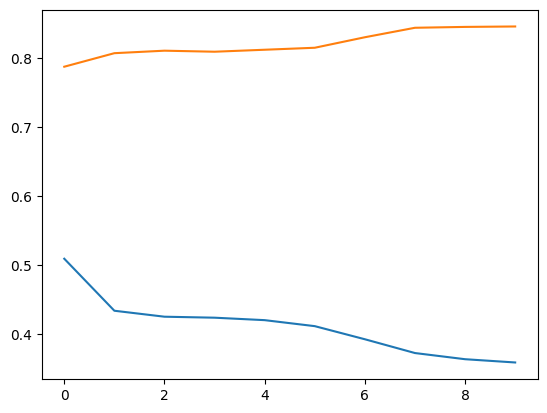

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])